<a href="https://colab.research.google.com/github/james-lucius/qworld/blob/main/QB_C2_Q12_First_Quantum_Programs_with_Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://qworld.net" target="_blank" align="left"><img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/images/header.jpg" align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

_prepared by Abuzer Yakaryilmaz_

<font size="28px" style="font-size:28px;" align="left"><b> First Quantum Programs with Qiskit </b></font>
<br><br>
[<img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/images/watch_lecture.jpg" align="left">](https://youtu.be/40xuWuwVgeA)
<br><br><br>

##### <font color="#08b806">Please execute the following cell, it is necessary to distinguish between your local environment and Google Colab's

In [2]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

SolutionToTask2 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1jCDfiY1kTeqVUwokhOvotEhuKZWjvujB?usp=sharing#scrollTo=CBGkkRa1zx4X' if in_colab() else 'QB_C2_Q12_First_Quantum_Programs_with_Qiskit_Solution.ipynb#task2')))

if in_colab():
    !pip install qiskit[visualization]==0.43.3
    !pip install qiskit-aer

##### In principle, every reversible classical program (i.e., a classical program containing only reversible operators) is also a quantum program.

NOT operator is a classical reversible operator, and so we can design quantum programs by using NOT operator.
<hr>

For our quantum programs, we will design quantum circuits by using quantum programming framework <a href="https://qiskit.org" target="_blank">Qiskit</a>.

As a warm-up example, here we design a circuit with a single quantum bit (qubit).

We highlight the details on designing quantum circuits along with our codes.

<h3> Design a circuit</h3>

We design a quantum circuit with a single quantum bit and a single classical bit.

We apply the NOT operator on the quantum bit, and then we measure the quantum bit, the outcome of which will be saved on the classical bit.

In [3]:
#
# A quantum circuit is composed by quantum and classical bits in Qiskit.
#

# here are the objects that we use to create a quantum circuit in qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# we use a quantum register to keep our quantum bits.
q =  QuantumRegister(1,"qreg") # in this example we will use a single quantum bit
# the second parameter is optional

# To retrieve an information from a quantum bit, it must be measured. (More details will appear.)
#     The measurement result is stored classically.
#     Therefore, we also use a classical regiser with classical bit(s)
c = ClassicalRegister(1,"creg") # in this example we will use a single classical bit
# the second parameter is optional

# now we can define our quantum circuit
# it is composed by a quantum and a classical registers
qc = QuantumCircuit(q,c)

# we apply operators on quantum bits
# operators are called as gates
# we apply NOT operator represented as "x" in qiskit
# operator is a part of the circuit, and we should specify the quantum bit as its parameter
qc.x(q[0]) # (quantum) bits are enumerated starting from 0
# NOT operator or x-gate is applied to the first qubit of the quantum register

# measurement is defined by associating a quantum bit to a classical bit
qc.measure(q[0],c[0])
# after the measurement, the observed value of the quantum bit is stored in the classical bit

# we run our codes until now, and then draw our circuit
print("The design of the circuit is done.")

The design of the circuit is done.


<h3> Visualize the circuit </h3>

Visualizing quantum circuits are always helpful to see the whole program at once.

We use two different circuit drawing methods of Qiskit.

In [4]:
# in Qiskit, the circuit object has a method called "draw"
# the default drawing method uses ASCII art

# let's draw our circuit now
qc.draw()

# re-execute this cell if you DO NOT see the circuit diagram

┌───┐┌─┐
  qreg: ┤ X ├┤M├
        └───┘└╥┘
creg: 1/══════╩═
              0

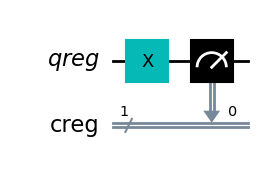

In [5]:
# we can draw the same circuit by using matplotlib
qc.draw(output='mpl')

As seen explicitly in the first diagram, each quantum or classical bit is set to value/state 0 at the beginning.

<i>As a convention in quantum computing (mechanics), state 0 is denoted as $ \ket{0} $. This notation is called as <b>ket</b>.</i>

Each quantum bit is represented as a single straight line. Each classical bit is represented as a double straight line. You may think of them as wires.

The x-gate and the measurement operators are shown as boxes. *Remark that the measurement operator is represented differently in the diagrams. Both are used in the literature.*

The number on the classical wire represents the index of classical bit storing the measurement outcome.

The state of the quantum bit is expected to be $ \ket{1} $ after the operator. So, the value of the classical bit after the measurement is expected to be 1.

<h3>Execute the circuit</h3>

A quantum program can be executed on a real quantum computer or a local classical simulator or a simulator in the cloud. Here we use a local classical simulator provided by Qiskit and so our results will be (almost) accurate.

*Remark that the existing real quantum computers are still noisy and so the observed results will be inaccurate.*

In [6]:
# we use the method "execute" and the object "Aer" from qiskit library
from qiskit import execute, Aer

# we create a job object for execution of the circuit
# there are three parameters
#     1. mycircuit
#     2. backend on which it will be executed: we will use local simulator
#     3. how many times it will be executed, by default it is 1024
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)

# we can get the result of the outcome as follows
counts = job.result().get_counts(qc)
print(counts) # counts is a dictionary

{'1': 1024}


That is, the outcome 1 is measured 1024 times.

<i>The output is composed by pairs, and each pair shows (i) the measurement outcome and (ii) its frequency.</i>

After executing the above program on a real quantum computer by using <a href="https://quantum-computing.ibm.com" target="_blank">IBM Quantum Experience</a>, we obtained the value of '0' 62 times and the value of '1' 962 times.

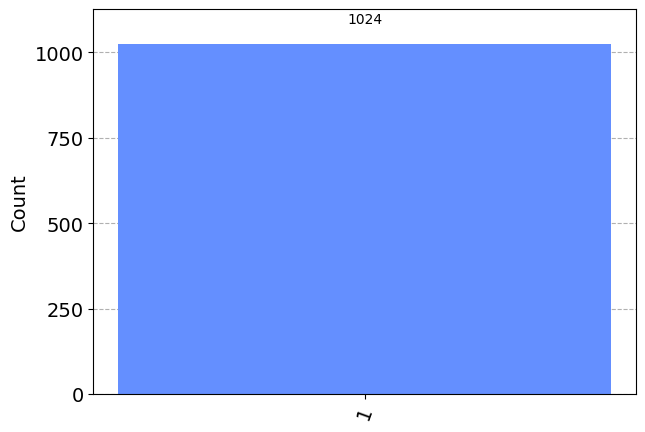

In [7]:
# we can show the result by using histogram as follows
from qiskit.visualization import plot_histogram
plot_histogram(counts)

<h3> Quantum assembly language </h3>

In the above execution, we used "qasm_simulator". Here "qasm" stands for Open Quantum Assembly Language. Our circuit is converted to qasm code before executing on simulators or real quantum computers.

<a href="https://en.wikipedia.org/wiki/OpenQASM" target="_blank">Wikipedia</a> (Feb 18, 2020): *Qasm is an intermediate representation for quantum instructions. The language was first described in a paper published in July 2017, and source code was released as part of IBM's Quantum Information Software Kit (Qiskit) for use with their IBM Q Experience cloud quantum computing platform. The language has similar qualities to traditional hardware description languages such as Verilog.*

In [8]:
#print qasm code of our program
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg reg_qreg[1];
creg reg_creg[1];
x reg_qreg[0];
measure reg_qreg[0] -> reg_creg[0];



<h3> A quantum circuit with more quantum bits</h3>

We design a new quantum circuit with four quantum bits.  

In [9]:
#
# A quantum circuit with four quantum and classical bits
#

# import all objects and methods at once
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define quantum and classical registers and then quantum circuit
q2 = QuantumRegister(4,"qreg")
c2 = ClassicalRegister(4,"creg")
qc2 = QuantumCircuit(q2,c2)

# apply x-gate to the first quantum bit twice
qc2.x(q2[0])
qc2.x(q2[0])

# apply x-gate to the fourth quantum bit once
qc2.x(q2[3])

# apply x-gate to the third quantum bit three times
qc2.x(q2[2])
qc2.x(q2[2])
qc2.x(q2[2])

# apply x-gate to the second quantum bit four times
qc2.x(q2[1])
qc2.x(q2[1])
qc2.x(q2[1])
qc2.x(q2[1])

# define a barrier (for a better visualization)
qc2.barrier()

# if the sizes of quantum and classical registers are the same, we can define measurements with a single line of code
qc2.measure(q2,c2)
# then quantum bits and classical bits are associated with respect to their indices

# run the codes until now, and then draw our circuit
print("The design of the circuit is done.")

The design of the circuit is done.


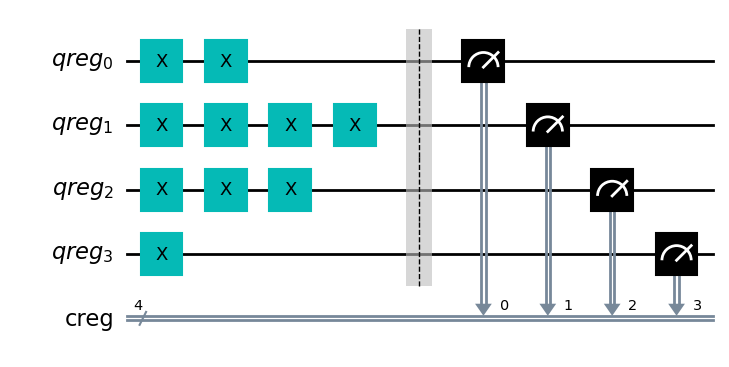

In [10]:
qc2.draw(output='mpl')
# re-execute this cell if the circuit diagram does not appear

The default order of quantum bits from top to down is $ qreg[0], qreg[1], qreg[2], qreg[3] $.

The order can be reversed as shown below.

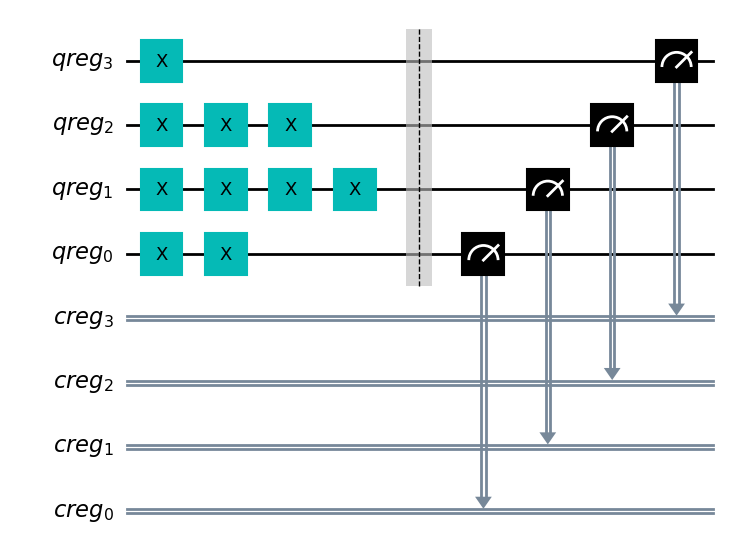

In [11]:
# by seting parameter "reverse_bits" to "True", the order of quantum bits are reversed when drawing

qc2.draw(output='mpl',reverse_bits=True)
# re-execute this cell if the circuit diagram does not appear

<h3> Task 1 </h3>

Guess the outcome by checking the circuit.

Then, compare your guess with the result obtained after executing our circuit 100 times.

In [12]:
job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc2)
print(counts)

{'1100': 100}


<h3>Reading order</h3>

Qiskit combines the four quantum bits in the following order:

$$ qreg[3], qreg[2], qreg[1], qreg[0] .$$

Then, each outcome is read in the same order.

The outcome is a binary number, and so the first digit is expected to be the most significant bit and the last digit is expected to be the least significant bit.

For example, $ 13 =  \mathbf{1} \cdot 2^3 + \mathbf{1} \cdot 2^2 + \mathbf{0} \cdot 2^1 + \mathbf{1} \cdot 2^0 $, which is equal to $ \mathbf{1101} $ in binary.

In this case, $ creg[3] = 1 $, $ creg[2] = 1 $, $ creg[1] = 0 $, and $ creg[0] = 1$.

<h3>Pick a random number in python</h3>

In the following task, you will be asked to apply x-gate to randomly picked quantum bits.

Here is one of the methods to pick a random number in python.

In [13]:
from random import randrange
n = 20
r=randrange(n) # pick a number from the list {0,1,...,n-1}
print(r)

# test this method by using a loop
for i in range(10):
    print(randrange(n))

17
3
5
13
16
18
14
11
5
1
3


<h3> Task 2: Randomly picking an 8-bit binary number </h3>

Design a quantum circuit with 8 quantum bits and 8 classical bits.

For each quantum bit, flip a coin by python, and apply x-gate if the outcome is head.

Measure your quantum bits.

Execute your circuit 10 times.

Repeat this task as much as you want, and enjoy your random choices.

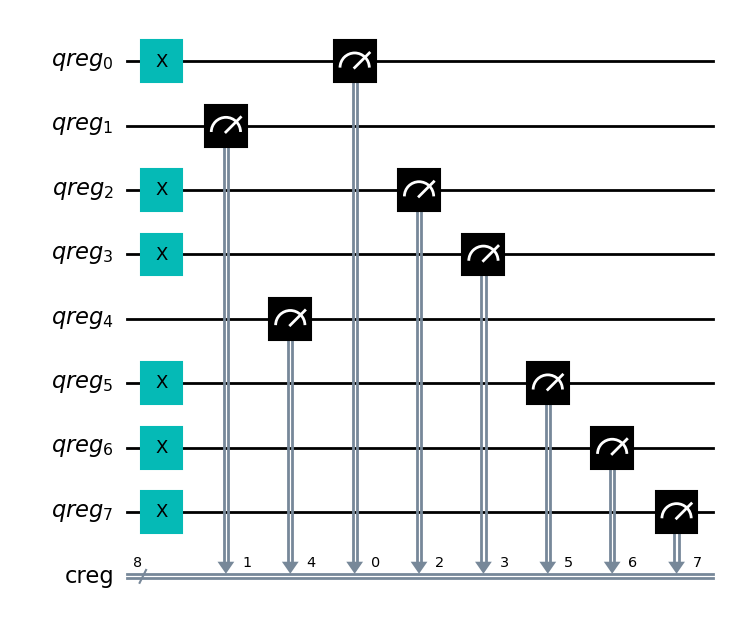

In [18]:
#
# your solution is here
#
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

q3 = QuantumRegister(8, 'qreg')
c3 = ClassicalRegister(8, 'creg')
qc = QuantumCircuit(q3, c3)
for i in range(8):
  if randrange(2) == 0: qc.x(q3[i])

qc.measure(q3, c3)
qc.draw(output='mpl')

In [19]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots = 1024)
counts = job.result().get_counts(qc)
print(counts)

{'11101101': 1024}


To check out our solution, run the next cell:

In [20]:
SolutionToTask2()  # show solution for task 2

<IPython.core.display.Javascript object>